In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from interstellar import Tracks, DenseNetwork, set_seed
import os

In [2]:
name = 'network_07'
save_path = f'/home/ADF/ajl573/Data/interstellar_data/{name}'

In [3]:
network = DenseNetwork.from_config(f'{save_path}/{name}_config.json')
network.load_model()
network.load_history()
network.model.summary()

Model: "network_07"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 5)]               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               1536      
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_11 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_12 (Dense)             (None, 256)               6

In [8]:
weights = network.model.get_weights()

In [40]:
weight = [weights[i] for i in range(0, len(weights), 2)]
bias = [weights[i] for i in range(1, len(weights), 2)]

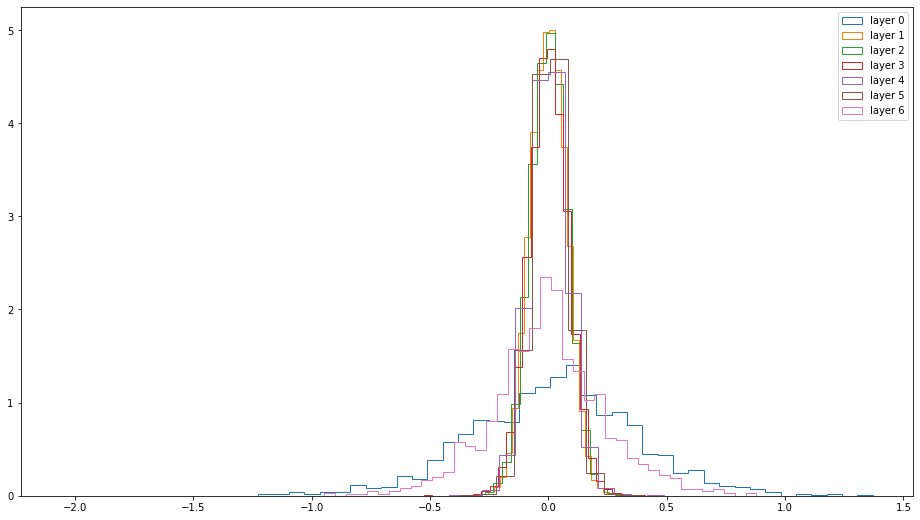

In [42]:
plt.figure(figsize=(16, 9))

for i, w in enumerate(weight):
    plt.hist(w.flatten(), bins=40, histtype='step', label=f'layer {i}', density=True)

plt.legend()

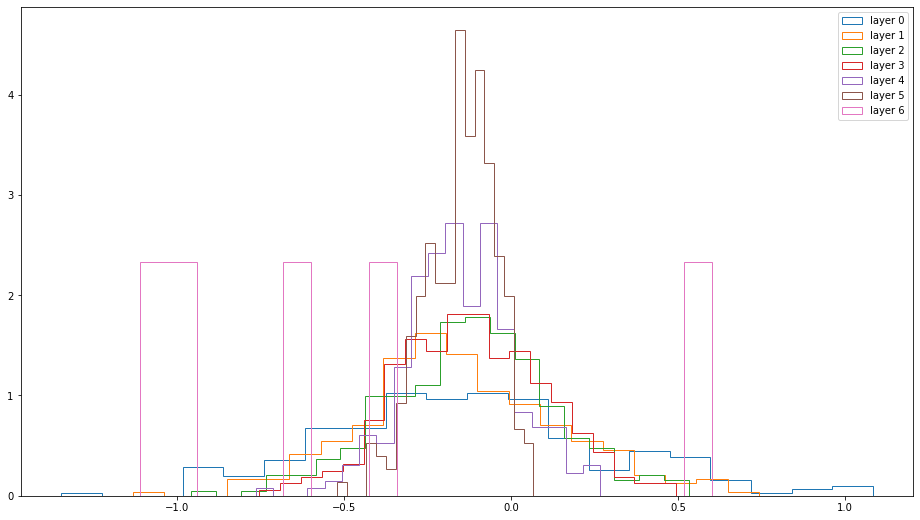

In [44]:
plt.figure(figsize=(16, 9))

for i, b in enumerate(bias):
    plt.hist(b, bins=20, histtype='step', label=f'layer {i}', density=True)

plt.legend()

In [47]:
def glorot_uniform(shape):
    ''' Returns initialized weights. '''
    limit = np.sqrt(6 / (shape[0] + shape[0]))
    return np.random.uniform(-limit, limit, size=shape)

In [50]:
init_weight = []
for w in weight:
    init_weight.append(glorot_uniform(w.shape))

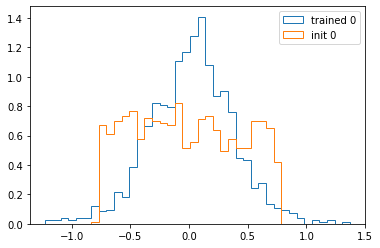

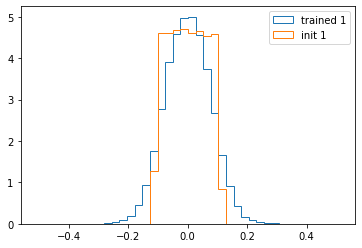

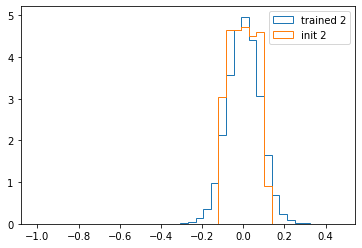

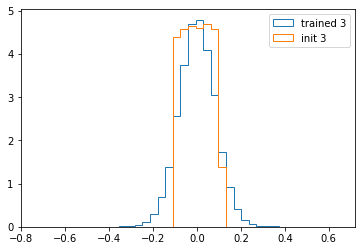

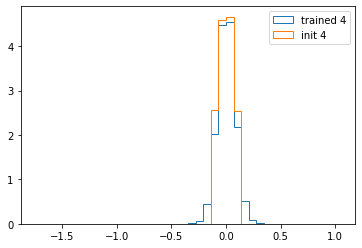

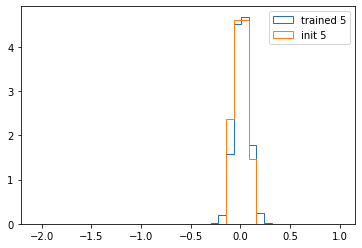

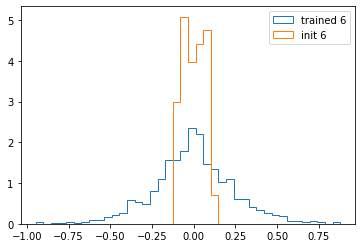

In [57]:
for i, (w, iw) in enumerate(zip(weight, init_weight)):
    plt.figure()
    plt.hist(w.flatten(), bins=40, histtype='step', label=f'trained {i}', density=True, range=(w.min(), w.max()))
    plt.hist(iw.flatten(), bins=40, histtype='step', label=f'init {i}', density=True, range=(w.min(), w.max()))
    plt.legend()